<a href="https://colab.research.google.com/github/min02choi/Machine-Learning/blob/main/Basic_Image_Classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Keras를 사용한 ML 기본사항<br>


# 기본 분류: 의류 이미지 분류

## 패션 MNIST 데이터셋 임포트하기
10개의 범주, 70000개의 흑백이미지로 구성된 데이터셋 불러오기
* 이미지 해상도 28*28

In [ ]:
# 텐서플로우, 관련 라이브러리 임포트
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


In [ ]:
# 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


load_data(): 네 개의 넘파이 배열이 반환
* train_~: 모델 학습에 사용되는 훈련세트
* test_~: 모델 테스트에 사용되는 훈련세트

In [ ]:
# 이미지는 클래스 레이블에 매핑(이름 X)
# 나중에 출력을 위해 별도의 변수 생성
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 탐색
모델 훈련 전 데이터셋 구조 파악

In [ ]:
train_images.shape

(60000, 28, 28)

60000개의 이미지, 각 이미지는 28*28 픽셀

In [ ]:
len(train_labels)

60000

훈련 세트에는 60000개의 레이블
* .shape로 했을 때 나오는 항목의 첫 번째(이미지 개수)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_labels.shape

(10000,)

## 데이터 전처리

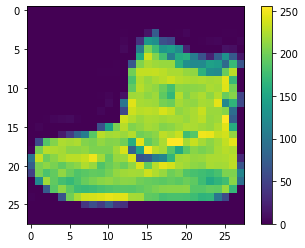

In [ ]:
plt.figure()      # 하는 것과 안하는 것의 차이는 무엇일까
plt.imshow(train_images[0])   # 화면에 이미지를 보여줌
plt.colorbar()                # 컬러바 표시
plt.grid(False)               # 표에 그리드 표시(기본값은 False)
plt.show()

In [ ]:
# 신경망 모델에 주입 전 범위 조정
train_images = train_images / 255.0
test_images = test_images / 255.0

값의 범위를 0 ~ 1 사이로 조정<br/>
훈련 세트와 테스트 세트를 동일한 방식으로 전처리 하는 것이 중요


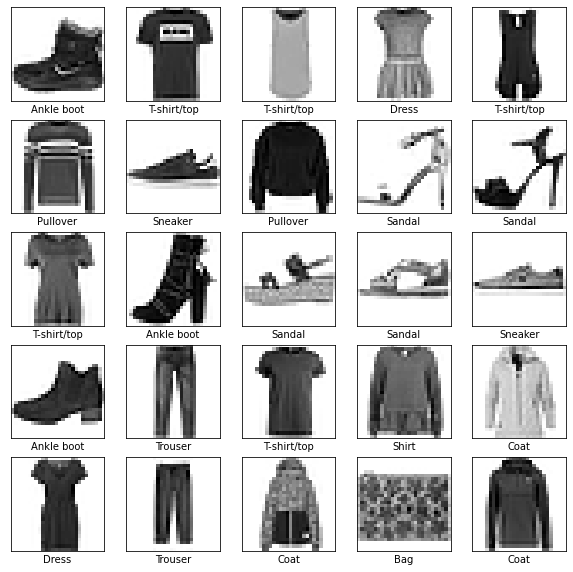

In [ ]:
# 훈련세트에서 기본 이미지 출력
plt.figure(figsize=(10, 10))

for i in range(25):       # 총 25개의 이미지 출력
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 구성
모델의 층을 쌓은 뒤 모델을 컴파일

In [ ]:
# 모델의 레이어 쌓기
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),    # 데이터 변환
    tf.keras.layers.Dense(128, activation="relu"),    # 128개의 노드
    tf.keras.layers.Dense(10)                         # 10개의 노드, 소프트맥스 층
])

tf.keras.layers.Flatten
* 2차원 배열(28*28)의 이미지 포멧을 28 * 28 = 784 픽셀의 1차원 배열로 변환
* 해당 층에서는 학습되는 가중치는 없음

tf.keras.layers.Dense
* 

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 모델 훈련
1. 훈련 데이터를 모델에 주입
2. ...

In [ ]:
# 훈련 시작
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4941 - accuracy: 0.8262
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3744 - accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3368 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3139 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2953 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2804 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2658 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2551 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2461 - accuracy: 0.9091
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.23

In [ ]:
# 정확도 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test Accuracy: ", test_acc, "\nTest Loss: ", test_loss)

313/313 - 1s - loss: 0.3445 - accuracy: 0.8819 - 529ms/epoch - 2ms/step
Test Accuracy:  0.8819000124931335 
Test Loss:  0.34445661306381226


테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮음

머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지기 때문(과대적합)

In [ ]:
# 예측하기
probability_model = tf.keras.Sequential([
    model,                      # 만든 모델을
    tf.keras.layers.Softmax()   # 확률로 반환
])

predictions = probability_model.predict(test_images)    # 예측

313/313 [==============================] - 1s 1ms/step


In [ ]:
# 예측 확인
predictions[0]    # 0번째 항목의 예측 결과

array([3.5095740e-09, 1.0018551e-13, 1.2614648e-11, 2.0352116e-12,
       1.4177709e-10, 1.2325637e-04, 1.2739057e-10, 1.3504157e-02,
       2.4439065e-10, 9.8637259e-01], dtype=float32)

10개의 숫자 배열로 출력됨

각 옷 품목(10개)에 상응하는 모델의 신뢰도를 나타냄

In [ ]:
np.argmax(predictions[0])

9

모델은 이 이미지가 앵클 부츠라고 확신하는 중

In [ ]:
# 실제 레이블 값 확인
test_labels[0]

9

0번째 사진은 앵클 부츠가 맞다!

### 예측을 그래프로 표현

In [ ]:
def plot_image(i, predictions_array, true_label, img):  # 매개변수: 몇 번쨰 사진, 클래스별 확률, 전체 항목의 레이블, 전체 항목의 이미지
  true_label, img = true_label[i], img[i]     # 인덱스 i의 실제 레이블과 이미지를 변수로 받음
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)    # 예측한 배열에서 가장 큰 값

  if (predictions_array == true_label):
    color = "blue"
  else:
    color = "red"

  # for i in range(10):
  #   print(" ", predictions_array[i])

  plt.xlabel("{} {:2.0f}% ({})" .format(class_names[predicted_label], 
                                        100 * np.max(predictions_array), 
                                        class_names[true_label],
                                        color=color))
  
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))   # x축 출력 (클래스 0~9)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])    # y축의 스케일
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color("red")
  thisplot[true_label]

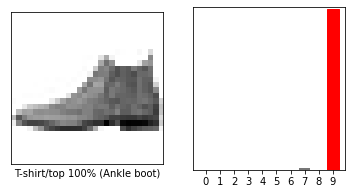

In [ ]:
# 예측 확인 >> 이상함, 코드 수정할것
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i].all(), test_labels, test_images)   # a.any(), a.all()
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()      # 왜 색이 반대로 나오냐ㅋㅋ

색이 반대로 나오는 문제?


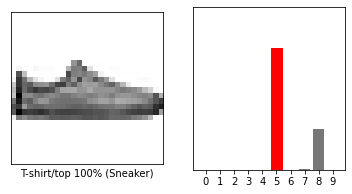

In [ ]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i].all(), test_labels, test_images)   # a.any(), a.all()
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()      # 왜 색이 반대로 나오냐ㅋㅋ

개판인데? 수정사항
* 바그래프의 색
* 왼쪽 그래프의 라벨 오류

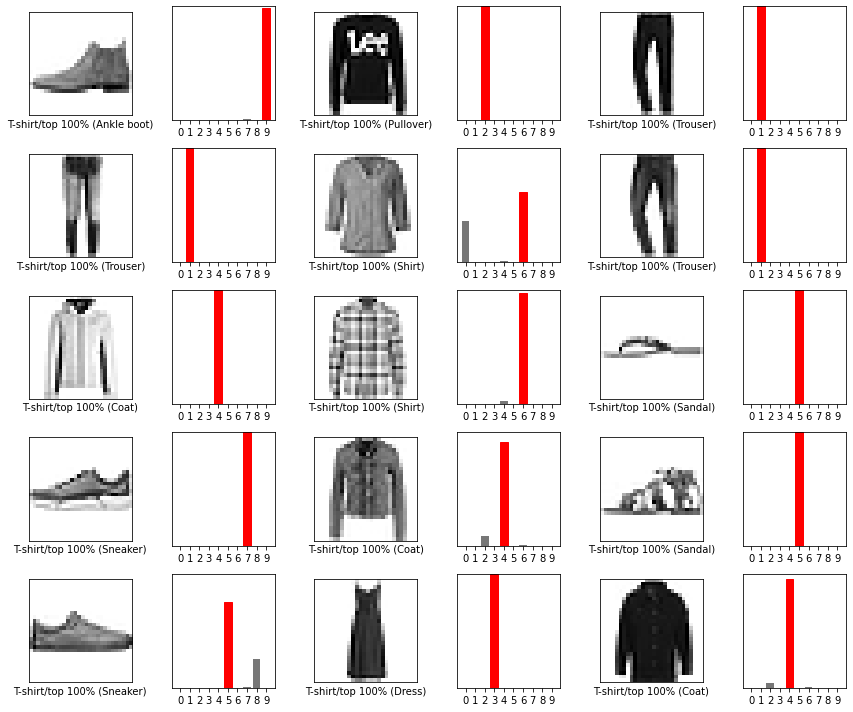

In [ ]:
# 여러 이미지의 예측 출력 >> 결과 개판
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
  plot_image(i, predictions[i].all(), test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

plt.figure
* figsize(float, float): 가로, 세로 크기(단위: 인치). 기본값: (6.4, 4.8)

## 훈련된 모델 사용하기

In [ ]:
# 테스트 할 하나의 이미지
img = test_images[1]
print(img.shape)

(28, 28)


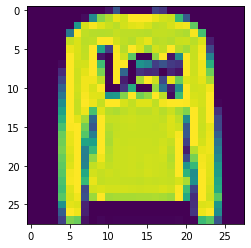

In [ ]:
# 테스트 할 이미지를 확인
plt.figure()
plt.imshow(img)
plt.show()

In [ ]:
# 흔련 이미지 동일하게 테스트 이미지 변경
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


* 출력값의 0번째 인덱스: 개수
* 1, 2번째 인덱스: 사이즈

In [ ]:
# 이미지 에측
predictions_single = probability_model.predict(img)   # 해당 이미지에 대한 예측

print(predictions_single)

1/1 [==============================] - 0s 24ms/step
[[2.8142219e-06 9.3795863e-17 9.9953079e-01 4.7388465e-11 3.8981609e-04
  1.7322476e-14 7.6605698e-05 2.1306919e-15 1.9101604e-13 3.1310151e-15]]


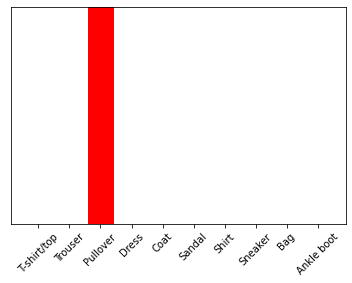

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

predictions_single은 2차원 배열
* predictions_single[0]에 각 클래스별 확률(배열)
* predictions_single[1] 이상의 값은 없는 거 같음

In [ ]:
np.argmax(predictions_single[0])

2